In [29]:
### 12th March
###13 March,
###dealing with TAD files

In [30]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [31]:

import pandas as pd

path1=('S009.xlsx')
colnames1=('#chr','x1','x2')

df=pd.read_excel(path,names=colnames1)
df['TAD-length x2 - x1']=(df['x2']-df['x1'])

df







#chr         x1         x2  TAD-length x2 - x1
0       9   19920000   21130000             1210000
1       9   18240000   19030000              790000
2       9   75810000   77290000             1480000
3       9   32360000   32990000              630000
4       9   13410000   14430000             1020000
...   ...        ...        ...                 ...
1304    8  126450000  126670000              220000
1305    8   27300000   27450000              150000
1306    8  142200000  142370000              170000
1307    8   68740000   68930000              190000
1308    8   21870000   22020000              150000

[1309 rows x 4 columns]

In [32]:
import pandas as pd

# Path to the Excel file
path = 'S009.xlsx'

# Define column names
colnames = ['chr', 'x1', 'x2']  

# Read Excel file with specified column names
df = pd.read_excel(path, names=colnames)

# Calculate TAD length and add it as a new column
df['TAD-length x2 - x1'] = df['x2'] - df['x1']

# Generate TAD_id column
df['TAD_id'] = ['TAD' + str(i).zfill(4) for i in range(1, len(df) + 1)]

# Display the DataFrame
print(df)


     chr         x1         x2  TAD-length x2 - x1   TAD_id
0      9   19920000   21130000             1210000  TAD0001
1      9   18240000   19030000              790000  TAD0002
2      9   75810000   77290000             1480000  TAD0003
3      9   32360000   32990000              630000  TAD0004
4      9   13410000   14430000             1020000  TAD0005
...   ..        ...        ...                 ...      ...
1304   8  126450000  126670000              220000  TAD1305
1305   8   27300000   27450000              150000  TAD1306
1306   8  142200000  142370000              170000  TAD1307
1307   8   68740000   68930000              190000  TAD1308
1308   8   21870000   22020000              150000  TAD1309

[1309 rows x 5 columns]


In [23]:
##### number of TADs in each chromosome
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

tadcounts=df.groupby('chr')['TAD_id'].value_counts()

tadcounts


chr  TAD_id 
1    TAD0481    1
     TAD0482    1
     TAD0483    1
     TAD0484    1
     TAD0485    1
               ..
X    TAD1226    1
     TAD1227    1
     TAD1228    1
     TAD1229    1
     TAD1230    1
Name: count, Length: 1309, dtype: int64

In [24]:
# Assuming 'df' is your DataFrame containing TAD information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct way to count the number of TADs in each chromosome
tad_counts = df.groupby('chr').size()

# If you specifically want to use 'TAD_id' for counting, you could also do:
# tad_counts = df.groupby('chr')['TAD_id'].count()

# Display the counts of TADs in each chromosome
print(tad_counts)



# Simple bar plot of TAD counts per chromosome
tad_counts.plot(kind='bar')
plt.xlabel('Chromosome')
plt.ylabel('Number of TADs')
plt.title('Number of TADs in Each Chromosome')
plt.show()


chr
1     147
2      84
3      96
4      26
5      63
6      76
7      61
8      79
9      65
10     40
11     50
12    107
13     15
14     16
15     58
16     23
17     71
18     35
19     47
20     70
21     26
22     36
X      18
dtype: int64


chr
1     147
2      84
3      96
4      26
5      63
6      76
7      61
8      79
9      65
10     40
11     50
12    107
13     15
14     16
15     58
16     23
17     71
18     35
19     47
20     70
21     26
22     36
X      18
Name: TAD_id, dtype: int64


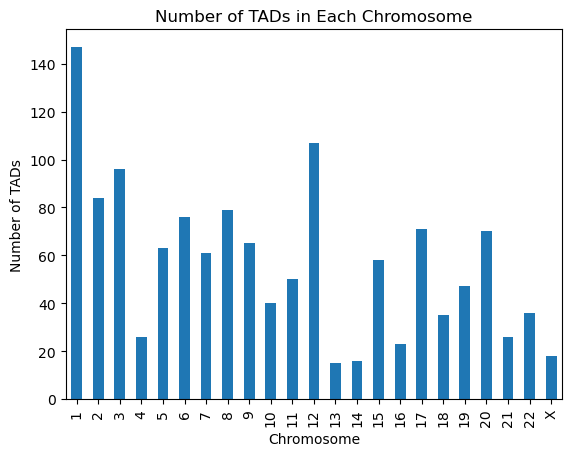

In [27]:
# Assuming 'df' is your DataFrame containing TAD information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# If you specifically want to use 'TAD_id' for counting, you could also do:
tad_counts = df.groupby('chr')['TAD_id'].count()

# Display the counts of TADs in each chromosome
print(tad_counts)



# Simple bar plot of TAD counts per chromosome
tad_counts.plot(kind='bar')
plt.xlabel('Chromosome')
plt.ylabel('Number of TADs')
plt.title('Number of TADs in Each Chromosome')
plt.savefig('Fig40.png')
plt.show()

In [28]:
## checking overlapping TADs

import pandas as pd

# Assuming df is your DataFrame and it has been loaded as shown in previous examples

# Function to check if two intervals overlap
def is_overlap(x1, x2, y1, y2):
    return max(x1, y1) < min(x2, y2)

# List to store tuples of overlapping TADs
overlapping_tads = []

# Iterate over each TAD and compare it with every other TAD
for i in range(len(df)):
    for j in range(i+1, len(df)):
        # Check if TADs are on the same chromosome and overlap
        if df.iloc[i]['chr'] == df.iloc[j]['chr'] and is_overlap(df.iloc[i]['x1'], df.iloc[i]['x2'], df.iloc[j]['x1'], df.iloc[j]['x2']):
            overlapping_tads.append((df.iloc[i]['TAD_id'], df.iloc[j]['TAD_id']))

# Convert list of tuples into a DataFrame for easy viewing
overlapping_tads_df = pd.DataFrame(overlapping_tads, columns=['TAD_id_1', 'TAD_id_2'])

print(overlapping_tads_df)


   TAD_id_1 TAD_id_2
0   TAD0009  TAD0019
1   TAD0068  TAD0078
2   TAD0073  TAD0086
3   TAD0169  TAD0189
4   TAD0192  TAD0262
5   TAD0483  TAD0500
6   TAD0646  TAD0689
7   TAD0824  TAD0839
8   TAD0892  TAD0905
9   TAD0893  TAD0895
10  TAD1019  TAD1023
11  TAD1154  TAD1160
12  TAD1155  TAD1175
13  TAD1158  TAD1177
14  TAD1161  TAD1169


In [ ]:
HPVint_df=